#AIML CA1 - Part A. Mushroom Dataset


By: Koh Hui Lyn (p2021672)
(open in colab got headers for easy viewing!!! :) )

From this dataset I want to predict the edibility of mushrooms using the provided features

In [9]:
#importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#import dataset
#drive
#df = pd.read_csv("/content/drive/MyDrive/datasets/agaricus-lepiota.data", header=None)

#not drive
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m


###Data Preprocessing


In [11]:
#adding the column names to df
columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
           'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
           'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number',
           'ring-type','spore-print-color','population','habitat']
df.columns = columns
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m


We can check our data for any null values by doing isnull().sum()

In [12]:
#check for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We can further try and find null values by displaying all the different values in the rows.

In [13]:
#Displaying all unique vals in all the rows
cols = df.columns
for i in cols:
  print(f'{i} : {df[i].unique()}')

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


From that, we found that the NaN values in this dataset is represented by '?'s. But there's only '?'s for one column, stalk-root.

In [14]:
#NaN values in this dataset is represented by '?'s. But there's only '?'s for one column, stalk-root.
df.isin(['?']).sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

We should replace NaNs with something more meaningful. Since this is categorical data, I decided to replace it with mode/the value that occured the most.

In [15]:
#Replacing '?'s with mode
df['stalk-root'] = df['stalk-root'].replace(['?'], df['stalk-root'].mode()[0])

In [16]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [17]:
#Plotting a Bar graph with counts of Class E & P vals
#check if data is balanced
df['stalk-root'].value_counts()


b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Columns with only one unique value is also not that useful to us, and should be dropped. Thus I decided to try and find if there's any.

In [18]:
#Finding rows with only 1 unique val
for i in cols:
  if len(df[i].unique())==1:
      print(f'{i}');

veil-type


In [19]:
#Removing columns (since veil-type only got 1 unique val, it's not very useful)
df = df.drop(['veil-type'], axis=1)

From this dataset, we aim to predict whether the mushrooms are Edible or Poisonous based on all the other factors.
y (to be predicted) = E or P 

Later on E = 0 and P = 1

Checking whether the y in the data is balanced to see if it's fair.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


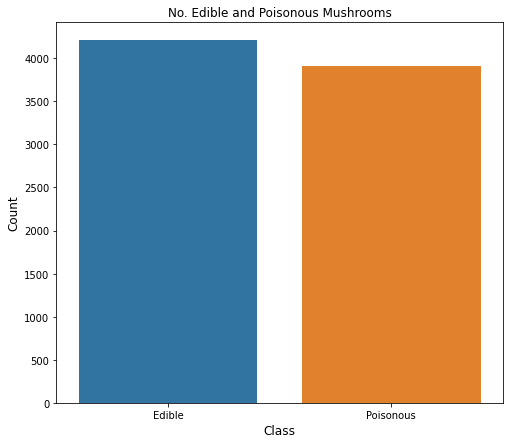

In [20]:
#Plotting a Bar graph with counts of Class E & P vals
#check if data is balanced
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(['Edible','Poisonous'], count.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title("No. Edible and Poisonous Mushrooms")
plt.show()

In [21]:
#Changes letters into numbers
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3


As having too many columns can cause the model to be overfitted, I decided to remove the rows with weak correlation to Class. (corr<0.3)

In [22]:
#Looking at corr
idx = df.corr().abs().nlargest(df.shape[1],"class").index
cm = df[idx].corr().abs()
cm['class']

class                       1.000000
gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-root                  0.324194
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
Name: class, dtype: float64

In [23]:
cm['class'] > 0.3

class                        True
gill-size                    True
gill-color                   True
bruises                      True
ring-type                    True
gill-spacing                 True
stalk-surface-above-ring     True
stalk-root                   True
stalk-surface-below-ring    False
population                  False
habitat                     False
ring-number                 False
cap-surface                 False
spore-print-color           False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-color                  False
gill-attachment             False
stalk-shape                 False
odor                        False
cap-shape                   False
cap-color                   False
Name: class, dtype: bool

In [24]:
#y is Poisonous or Edible column (to be predicted)
y = df["class"]

#x is every column except Class column
X = df.drop(["class"], axis=1)

In [25]:
#Removing poor predictors <0.3
X = df[['gill-size', 'gill-color','bruises','ring-type','gill-spacing','stalk-surface-above-ring','stalk-root']]

In [26]:
#Managed to reduce down to 7 columns
len(X.columns)

7

###One Hot Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder
oneHot = OneHotEncoder()
#One hot encoding X
X_Hot = oneHot.fit_transform(X).toarray()
X_Hot = pd.DataFrame(X_Hot)

#Adding headers to new one hot column
headers = oneHot.get_feature_names(X.columns)
X_Hot.columns = headers
X_Hot.head(3)

,gill-size_0,gill-size_1,gill-color_0,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,bruises_0,bruises_1,ring-type_0,ring-type_1,ring-type_2,ring-type_3,ring-type_4,gill-spacing_0,gill-spacing_1,stalk-surface-above-ring_0,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-above-ring_3,stalk-root_0,stalk-root_1,stalk-root_2,stalk-root_3
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [28]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Hot, y, test_size=0.2, random_state=42)

In [29]:
scores = pd.DataFrame(columns=["Model", "Train Score", "Accuracy(Train)","Accuracy(Test)", "ROC Score"])

###K-Nearest Neighbor

I plan to fine tune all the models with GridSearchCV and then see which fine tuned model performs the best overall

In [ ]:
#Finding best params for knn with gridsearchcv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=params, cv=10)
grid.fit(X_train, y_train)

print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test, y_test)))


Best mean cross_validation score: 0.983
Best parameters: {'n_neighbors': 2}
Test-set score (Best): 0.988
Test-set score (Grid): 0.988


Took the best params from the GridSearch (n_neighbors=2) and put into my model

In [32]:
#KNN
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,y_train)
print("Train score",clf.score(X_train,y_train))
print("Test score",clf.score(X_test,y_test))
# make predictions
expected = y_test
predicted = clf.predict(X_test)
roc_score = roc_auc_score(y_test, predicted)
print('ROC score: ', roc_score)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTest = format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Test) =" ,accTest)

# make predictions
expected = y_train
predicted = clf.predict(X_train)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTrain =format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Train) =",accTrain)
append = {"Model": 'K-Nearest Neighbor', "Train Score": format(clf.score(X_train,y_train),".3f"),
          "Test Score": format(clf.score(X_test,y_test),".3f"),
          "Accuracy(Test)" : accTest, "Accuracy(Train)": accTrain, "ROC Score": format(roc_score,".2f")}
scores = scores.append(append, ignore_index=True)

Train score 0.9833820587782736
Test score 0.9876923076923076
ROC score:  0.9872122762148338
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.97      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

[[843   0]
 [ 20 762]]
Accuracy(Test) = 98.77
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3365
           1       1.00      0.97      0.98      3134

    accuracy                           0.98      6499
   macro avg       0.98      0.98      0.98      6499
weighted avg       0.98      0.98      0.98      6499

[[3365    0]
 [ 108 3026]]
Accuracy(Train) = 98.34


###Dummy Model


Included a dummy model so that can compare to other models

In [30]:
#Finding best params for dummy with gridsearchcv
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

params = {'strategy': ['stratified','most_frequent','prior','uniform','constant']}
dum = DummyClassifier()
grid = GridSearchCV(dum, param_grid=params, cv=10)
grid.fit(X_train, y_train)

print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test, y_test)))


Best mean cross_validation score: 0.518
Best parameters: {'strategy': 'most_frequent'}
Test-set score (Best): 0.519
Test-set score (Grid): 0.519


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Constant target value has to be specified when the constant strategy is used.

  FitFailedWarning)


In [34]:
#Dummy
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy = 'most_frequent')
clf.fit(X_train,y_train)
print("Train score",clf.score(X_train,y_train))
print("Test score",clf.score(X_test,y_test))
# make predictions
expected = y_test
predicted = clf.predict(X_test)
roc_score = roc_auc_score(y_test, predicted)
print('ROC score: ', roc_score)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTest = format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Test) =" ,accTest)

# make predictions
expected = y_train
predicted = clf.predict(X_train)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTrain =format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Train) =",accTrain)
append = {"Model": 'Dummy Model', "Train Score": format(clf.score(X_train,y_train),".3f"),
          "Test Score": format(clf.score(X_test,y_test),".3f"),
          "Accuracy(Test)" : accTest, "Accuracy(Train)": accTrain, "ROC Score": format(roc_score,".2f")}
scores = scores.append(append, ignore_index=True)

Train score 0.5177719649176796
Test score 0.5187692307692308
ROC score:  0.5
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       843
           1       0.00      0.00      0.00       782

    accuracy                           0.52      1625
   macro avg       0.26      0.50      0.34      1625
weighted avg       0.27      0.52      0.35      1625

[[843   0]
 [782   0]]
Accuracy(Test) = 51.88
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      3365
           1       0.00      0.00      0.00      3134

    accuracy                           0.52      6499
   macro avg       0.26      0.50      0.34      6499
weighted avg       0.27      0.52      0.35      6499

[[3365    0]
 [3134    0]]
Accuracy(Train) = 51.78


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Logistic Regression

I chose to include logistic regression as it is a simpler model compared to the rest

In [ ]:
#Finding best params
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

params = {'penalty':['l2', 'l1', 'elasticnet'], 'C':np.logspace(-3, 3, num=7, base=10)}
reg = LogisticRegression()
grid = GridSearchCV(reg, param_grid=params, cv=10)
grid.fit(X_train, y_train)

print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test, y_test)))

Best mean cross_validation score: 0.954
Best parameters: {'C': 100.0, 'penalty': 'l2'}
Test-set score (Best): 0.951
Test-set score (Grid): 0.951


In [35]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100, penalty='l2')
clf.fit(X_train,y_train)
print("Train score",clf.score(X_train,y_train))
print("Test score",clf.score(X_test,y_test))
# make predictions
expected = y_test
predicted = clf.predict(X_test)
roc_score = roc_auc_score(y_test, predicted)
print('ROC score: ', roc_score)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTest = format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Test) =" ,accTest)

# make predictions
expected = y_train
predicted = clf.predict(X_train)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTrain =format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Train) =",accTrain)
append = {"Model": 'Logistic Regression', "Train Score": format(clf.score(X_train,y_train),".3f"),
          "Test Score": format(clf.score(X_test,y_test),".3f"),
          "Accuracy(Test)" : accTest, "Accuracy(Train)": accTrain, "ROC Score": format(roc_score,".2f")}
scores = scores.append(append, ignore_index=True)

Train score 0.9556854900753962
Test score 0.9507692307692308
ROC score:  0.9507922927797144
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.95      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

[[801  42]
 [ 38 744]]
Accuracy(Test) = 95.08
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3365
           1       0.97      0.94      0.95      3134

    accuracy                           0.96      6499
   macro avg       0.96      0.96      0.96      6499
weighted avg       0.96      0.96      0.96      6499

[[3263  102]
 [ 186 2948]]
Accuracy(Train) = 95.57


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###Decision Tree Classifier

In [ ]:
#Finding best params
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion': ['gini','entropy'], 'max_depth': [5,6,7,8,9,10,11,12,13,14,15]}
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test, y_test)))


Best mean cross_validation score: 0.983
Best parameters: {'criterion': 'gini', 'max_depth': 10}
Test-set score (Best): 0.988
Test-set score (Grid): 0.988


In [37]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=10) 
clf.fit(X_train,y_train)
print("Train score",clf.score(X_train,y_train))
print("Test score",clf.score(X_test,y_test))
# make predictions
expected = y_test
predicted = clf.predict(X_test)
roc_score = roc_auc_score(y_test, predicted)
print('ROC score: ', roc_score)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTest = format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Test) =" ,accTest)

# make predictions
expected = y_train
predicted = clf.predict(X_train)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTrain =format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Train) =",accTrain)
append = {"Model": 'Decision Tree', "Train Score": format(clf.score(X_train,y_train),".3f"),
          "Test Score": format(clf.score(X_test,y_test),".3f"),
          "Accuracy(Test)" : accTest, "Accuracy(Train)": accTrain, "ROC Score": format(roc_score,".2f")}
scores = scores.append(append, ignore_index=True)

Train score 0.9833820587782736
Test score 0.9876923076923076
ROC score:  0.9872122762148338
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.97      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

[[843   0]
 [ 20 762]]
Accuracy(Test) = 98.77
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3365
           1       1.00      0.97      0.98      3134

    accuracy                           0.98      6499
   macro avg       0.98      0.98      0.98      6499
weighted avg       0.98      0.98      0.98      6499

[[3365    0]
 [ 108 3026]]
Accuracy(Train) = 98.34


###Support Vector Machine

In [ ]:
#Finding best params
from sklearn.svm import SVC
param_grid = {'C':np.logspace(-3, 3, num=7, base=10)}
svc = SVC()
grid = GridSearchCV(svc, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test, y_test)))


Best mean cross_validation score: 0.983
Best parameters: {'C': 1.0}
Test-set score (Best): 0.988
Test-set score (Grid): 0.988


In [38]:
#Support Vector Machine
from sklearn.svm import SVC
clf = SVC(C=1) 
clf.fit(X_train,y_train)
print("Train score",clf.score(X_train,y_train))
print("Test score",clf.score(X_test,y_test))
# make predictions
expected = y_test
predicted = clf.predict(X_test)
roc_score = roc_auc_score(y_test, predicted)
print('ROC score: ', roc_score)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTest = format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Test) =" ,accTest)

# make predictions
expected = y_train
predicted = clf.predict(X_train)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTrain =format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Train) =",accTrain)
append = {"Model": 'Support Vector Machine', "Train Score": format(clf.score(X_train,y_train),".3f"),
          "Test Score": format(clf.score(X_test,y_test),".3f"),
          "Accuracy(Test)" : accTest, "Accuracy(Train)": accTrain, "ROC Score": format(roc_score,".2f")}
scores = scores.append(append, ignore_index=True)

Train score 0.9833820587782736
Test score 0.9876923076923076
ROC score:  0.9872122762148338
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.97      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

[[843   0]
 [ 20 762]]
Accuracy(Test) = 98.77
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3365
           1       1.00      0.97      0.98      3134

    accuracy                           0.98      6499
   macro avg       0.98      0.98      0.98      6499
weighted avg       0.98      0.98      0.98      6499

[[3365    0]
 [ 108 3026]]
Accuracy(Train) = 98.34


##Gaussian Naive Bayes

In [ ]:
#Finding best params
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing': np.logspace(-3,3, num=100)}
GNB = GaussianNB()
grid = GridSearchCV(GNB, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("Best mean cross_validation score: {:.3f}".format(grid.best_score_))
print("Best parameters:",grid.best_params_)
print("Test-set score (Best): {:.3f}".format(grid.best_estimator_.score(X_test,y_test)))
print("Test-set score (Grid): {:.3f}".format(grid.score(X_test, y_test)))


Best mean cross_validation score: 0.911
Best parameters: {'var_smoothing': 0.001}
Test-set score (Best): 0.906
Test-set score (Grid): 0.906


In [39]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing =  0.001)
clf.fit(X_train,y_train)
print("Train score",clf.score(X_train,y_train))
print("Test score",clf.score(X_test,y_test))
# make predictions
expected = y_test
predicted = clf.predict(X_test)
roc_score = roc_auc_score(y_test, predicted)
print('ROC score: ', roc_score)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTest = format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Test) =" ,accTest)

# make predictions
expected = y_train
predicted = clf.predict(X_train)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accTrain =format(metrics.accuracy_score(expected, predicted)*100,".2f")
print("Accuracy(Train) =",accTrain)
append = {"Model": 'Gaussian Naive Bayes', "Train Score": format(clf.score(X_train,y_train),".3f"),
          "Test Score": format(clf.score(X_test,y_test),".3f"),
          "Accuracy(Test)" : accTest, "Accuracy(Train)": accTrain, "ROC Score": format(roc_score,".2f")}
scores = scores.append(append, ignore_index=True)

Train score 0.9113709801507924
Test score 0.9064615384615384
ROC score:  0.9035072949185863
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       843
           1       0.98      0.82      0.89       782

    accuracy                           0.91      1625
   macro avg       0.92      0.90      0.91      1625
weighted avg       0.92      0.91      0.91      1625

[[828  15]
 [137 645]]
Accuracy(Test) = 90.65
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3365
           1       0.99      0.83      0.90      3134

    accuracy                           0.91      6499
   macro avg       0.92      0.91      0.91      6499
weighted avg       0.92      0.91      0.91      6499

[[3332   33]
 [ 543 2591]]
Accuracy(Train) = 91.14


##Deciding which model to use

In [40]:
scores.sort_values(by="ROC Score", ascending=False)

,Model,Train Score,Accuracy(Train),Accuracy(Test),ROC Score,Test Score
0,K-Nearest Neighbor,0.983,98.34,98.77,0.99,0.988
3,Decision Tree,0.983,98.34,98.77,0.99,0.988
4,Support Vector Machine,0.983,98.34,98.77,0.99,0.988
2,Logistic Regression,0.956,95.57,95.08,0.95,0.951
5,Gaussian Naive Bayes,0.911,91.14,90.65,0.90,0.906
1,Dummy Model,0.518,51.78,51.88,0.50,0.519


Since KNN, Decision Tree and SVM all has the same scores, I decided to go with Decision Tree

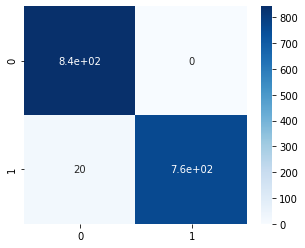

In [ ]:
#Creating confusion matrix
expected = y_test
model = DecisionTreeClassifier(criterion='gini', max_depth=10) 
model.fit(X_train,y_train)
predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(expected, predicted)
plt.figure(figsize = (5,4))
sns.heatmap(cm2, cmap='Blues', annot=True)
plt.show()

From this we can see that the K-Nearest Neighbours model predicted 0 Edible mushrooms wrongly, and 31 poisonous mushrooms wrongly.
Predicting poisonous mushrooms wrongly is worse compared to predicting edible mushrooms wrongly. The model classified 20 Poison mushrooms as Edible, and this might be a very fatal mistake, as a person may get poisoned from consuming these wrongly classified mushrooms.
However, the ratio of wrongly predicted mushrooms to correctly predicted ones is very small. (31:760)

roc_auc_score for Decision Tree:  0.9872122762148338


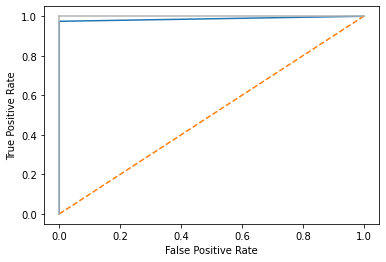

In [ ]:
#Roc Curve
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, threshold = roc_curve(y_test, predicted)
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, predicted))

plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Alternatively, from the ROC we can see that the model's ROC score is very close to 1, but not 1. This means the model is mostly accurate at its predictions, and not very overfitted as well.

We can see that the model thinks that stalk_surface_above_ring_1 is the most important (stalk_surface_above_ring = k), followed by gill-size_0 (gill-size = b), and then followed by bruises_0 (bruises = f)

In [ ]:
#Looking at important Features
feat = pd.DataFrame(
    {"features importance": model.feature_importances_},
    index=X_Hot.columns
)
feat.sort_values(by="features importance", ascending=False, inplace=True)
feat

,features importance
stalk-surface-above-ring_1,0.373537
gill-size_0,0.330529
bruises_0,0.074781
gill-spacing_0,0.070128
stalk-root_2,0.039918
gill-color_0,0.027675
bruises_1,0.022010
ring-type_4,0.018339
stalk-surface-above-ring_0,0.010345
gill-color_8,0.009887


1. cap-shape:                bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?:                 bruises=t,no=f
5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
musty=m,none=n,pungent=p,spicy=s
6. gill-attachment:          attached=a,descending=d,free=f,notched=n
7. gill-spacing:             close=c,crowded=w,distant=d
8. gill-size:                broad=b,narrow=n
9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
green=r,orange=o,pink=p,purple=u,red=e,
white=w,yellow=y
10. stalk-shape:              enlarging=e,tapering=t
11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
pink=p,red=e,white=w,yellow=y
16. veil-type:                partial=p,universal=u
17. veil-color:               brown=n,orange=o,white=w,yellow=y
18. ring-number:              none=n,one=o,two=t
19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
orange=o,purple=u,white=w,yellow=y
21. population:               abundant=a,clustered=c,numerous=n,
scattered=s,several=v,solitary=y
22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
urban=u,waste=w,woods=d